<a href="https://colab.research.google.com/github/damaris1701/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar ​​un dataframe de al menos 100 filas con datos aleatorios con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contiene las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Física", "Química", "Biología", "Educación Física", "Inglés", "Ciudadanía", "Arte", "Música", "Informática"]

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Luis", "Sofia", "Carlos", "Laura", "Diego", "Martina"]
  apellidos = ["Gomez", "Perez", "Rodriguez", "Gonzalez", "Lopez", "Martinez", "Sanchez", "Romero", "Fernandez", "Torres"]
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Generar datos para 100 alumnos
data = []
for i in range(100):
  nombre = generar_nombre()
  dni = random.randint(10000000, 99999999)
  for materia in materias:
      nota1 = random.randint(1, 10)
      nota2 = random.randint(1, 10)
      nota3 = random.randint(1, 10)
      faltas = random.randint(0, 20)
      data.append([nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre y Apellido", "Nro. DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar el DataFrame
df

,Nombre y Apellido,Nro. DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Sofia Fernandez,10241633,Matemática,7,7,7,18
1,Sofia Fernandez,10241633,Lengua y Literatura,8,9,5,7
2,Sofia Fernandez,10241633,Historia,3,2,9,6
3,Sofia Fernandez,10241633,Geografía,5,5,10,12
4,Sofia Fernandez,10241633,Ciencias Naturales,4,9,9,3
...,...,...,...,...,...,...,...
1395,Sofia Perez,13020322,Inglés,3,3,3,11
1396,Sofia Perez,13020322,Ciudadanía,8,9,4,10
1397,Sofia Perez,13020322,Arte,6,3,5,10
1398,Sofia Perez,13020322,Música,8,7,6,6


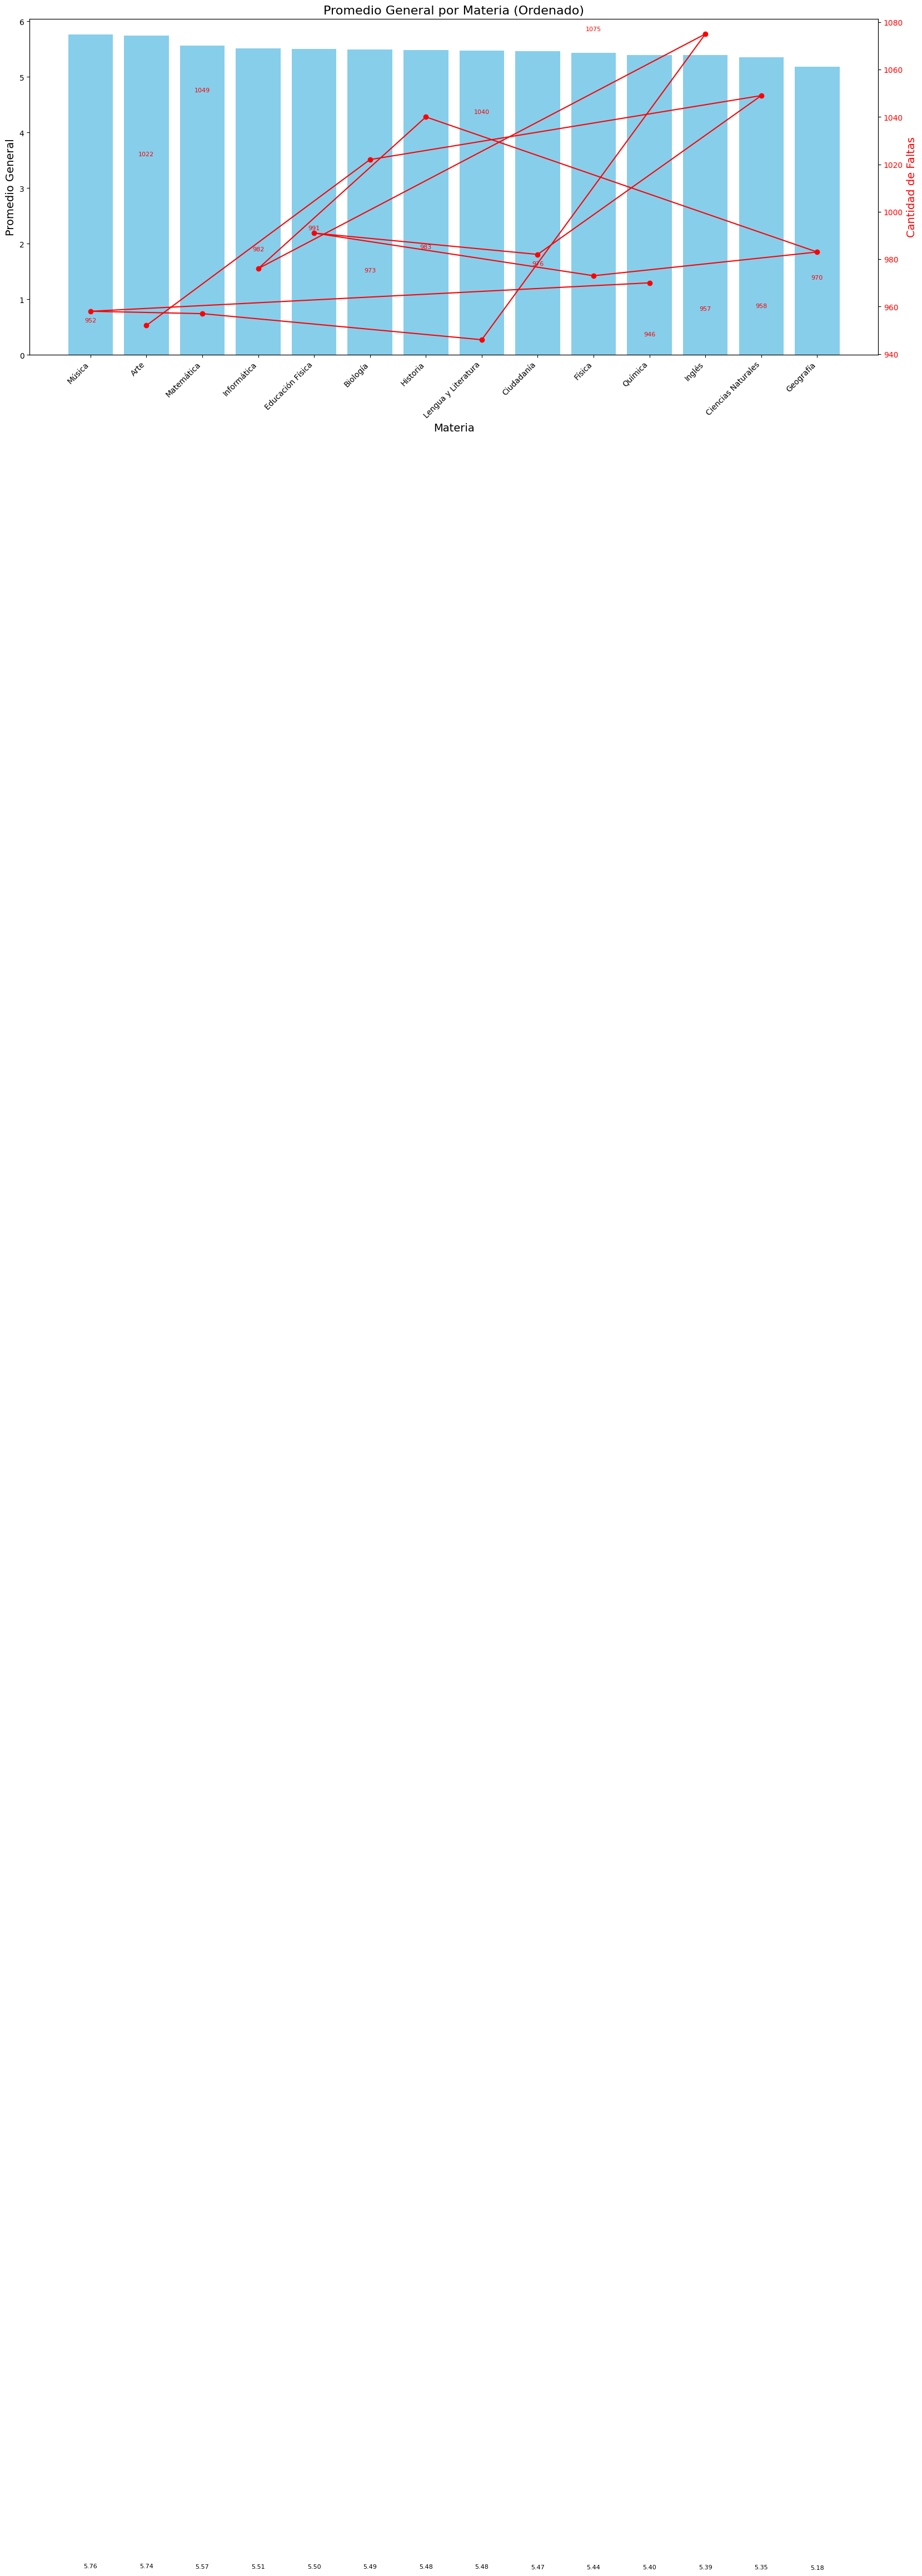

In [11]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby("Materia Escolar")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby("Materia Escolar")["Faltas a clases"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))
ax1 = plt.bar(promedios_ordenados.index, promedios_ordenados.values, color="skyblue")
plt.xlabel("Materia", fontsize=14)
plt.ylabel("Promedio General", fontsize=14)
plt.title("Promedio General por Materia (Ordenado)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10) # Rotar las etiquetas del eje x
plt.tight_layout() # Ajusta el espaciado para evitar superposiciones

# Agregar el eje secundario para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, marker="o", color="red", linestyle="-")
ax2.set_ylabel("Cantidad de Faltas", color="red", fontsize=14)
ax2.tick_params(axis="y", labelcolor="red")


# Agregar leyendas
for i, v in enumerate(promedios_ordenados.values):
  plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=8) # Mostrar el promedio sobre cada barra

for i, v in enumerate(faltas_por_materia.values):
  plt.text(i, v + 1, f"{v}", ha='center', va='bottom', color='red', fontsize=8)

plt.show()

In [12]:
df.to_csv("datos_alumnos.csv", index=False)

